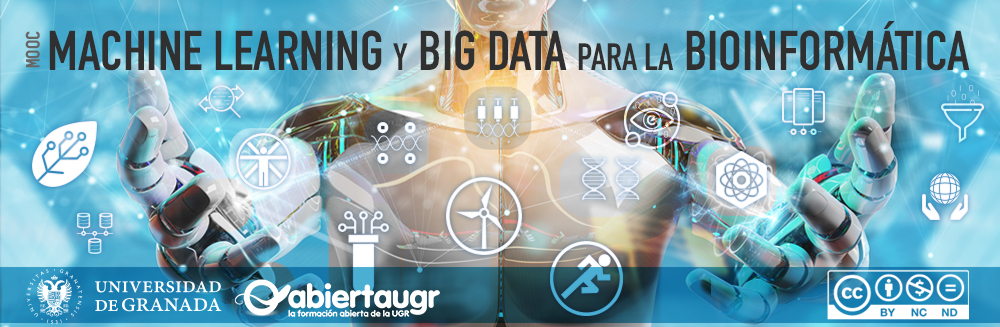


## **Módulo 7 - Big Data**
### **7.3 - Machine Learning en Spark: MLlib.**

**Autor**: 

*Por* **Fco. Javier García Castellano**.

*Profesor Titular de Universidad. Departamento de Ciencias de Computación e Inteligencia Artificial (DECSAI). Universidad de Granada.*


**Recordatorio: Introducción a NoteBook**

Dentro de este cuaderno (NoteBook), se le guiará paso a paso desde la carga de un conjunto de datos hasta el análisis descriptivo de su contenido.

El cuaderno de Jupyter es un enfoque para ejecutar celdas precodificadas y ver los resultados directamente sobre la celda ejecutada. Cada celda de este cuaderno debe ser ejecutada secuencialmente. Si te saltas alguna, puede que el programa lance un error, así que empieza desde el principio en caso de duda.

Antes de nada 

Es muy muy importante que al comienzo selecciones "Abrir en modo de ensayo" (draft mode), arriba a la izquierda. En caso contrario no te dejará ejecutar ningún bloque de código. Cuando ejecutes el primero de los bloques, aparecerá el siguiente mensaje: "Advertencia: Este cuaderno no lo ha creado Google.". Tranquilos, debéis confiar en el contenido del cuaderno (NoteBook) y pulsar en "Ejecutar de todos modos".

¡Ánimo!

¡Vamos a por todas!
Haz clic en el botón "play" en la parte izquierda de cada celda de código. Las líneas que comienzan con un hashtag (#) son comentarios y no afectan a la ejecución del programa.

También puedes pinchar sobre cada celda y hacer "ctrl+enter" (cmd+enter en Mac).

Cada vez que ejecutes algo, verás la salida justo debajo. La información suele ser siempre la relativa a la última instrucción, junto con todos los print() que haya en el código.

## **ÍNDICE**


En este *notebook*: 
1. Empezaremos a conoce la parte de Machine Learning de Apache Spark:MLlib.
2. Veremos como preparar los datos para que un modelo pueda aprenderlos.
3. Aprenderemos a utilizar las tubería para optimizar el flujo de trabajo. 
4. Veremos como validar en Spark los modelos aprendidos

Contenidos:
1. Introducción. 

2. Preparar los DataFrame para SparK ML. 
  
3. Tuberías de Spark (Pipelines).

4. Tuberías con Machine Learning.

5. Métricas para la evaluación de los modelos de aprendizaje supervisado.

6. Validación de los modelos de aprendizaje supervisado.


##**1. INTRODUCCIÓN.**

MLlib es la biblioteca de Machine Learning de Apache Spark. Lo interesante de MLlib, es que los algoritmos de MLlib están pensados para entornos distribuidos, son altamente escalables y con tolerancia a fallos, pues están basados en Spark.

Proporciona las siguientes herramientas:

*   Algoritmos de Machine Learningg: algoritmos comunes de clasificación, regresión, clustering o filtros colaborativos.
*   Herramientas de preprocesamiento de datos: herramienta para extraer, seleccionar o transformar las variables.
*   Tuberías (Pipelines): es una herramienta para optimizar los flujos de trabajo en Machine Learning.
*   Persistencia: para guardar y leer algoritmos, modelos y tuberías.
*   Utilidades:  álgebra lineal, estadística, manejo de datos, etc.


Cuando usamos Python, dentro de MLlib podemos encontrar dos interfaces de programación:
* [Spark ML](https://spark.apache.org/docs/latest/api/python/pyspark.ml.html ) (o [DataFrame MLlib API](https://spark.apache.org/docs/latest/mllib-guide.html#mllib-main-guide)): Que está basada en DataFrames y que está dentro del paquete `spark.ml`. Desde la versión 2.0 esta la versión por defecto y la que se aconseja usar. 
* [Spark MLlib](https://spark.apache.org/docs/latest/api/python/pyspark.mllib.html ) (o [RDD MLlib API](https://spark.apache.org/docs/latest/mllib-guide.html#mllib-rdd-based-api-guide)): Es la interfaz de programación original y está basada en RDD. Está dentro del paquete `spark.mllib`. Actualmente está en modo mantenimiento y es muy probable que deje de existir en Spark 3.0.

El cambio de pasar de API basada en RDDs a otra basada en DataFrames, se debe a que, como hemos visto, éstos últimos son más rápidos y fáciles de manejar.

En este cuaderno (notebook) vamos a seguir trabajando con Spark en Google Colaboratory, por lo que los prolegómenos son los mismos, como se muestran a continuación.

In [ ]:
#Primero instalamos Java y Apache Spark
!apt-get install openjdk-8-jdk-headless -qq  #Instalamos Java

#Nos descargamos Apache Spark con Hadoop
!wget -q http://www-eu.apache.org/dist/spark/spark-2.4.7/spark-2.4.7-bin-hadoop2.7.tgz 
!tar xf spark-2.4.7-bin-hadoop2.7.tgz #Instalamos Apache Spark


#Instalamos los paquetes de Python para trabajar con Spark
!pip install findspark #Instalamos FindSpark
!pip install pyspark   #Instalamos Spark


#Indicamos a PySpark donde está Spark
import findspark
findspark.init("spark-2.4.7-bin-hadoop2.7")#SPARK_HOME


#Inicializamos las variables de entorno
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.7-bin-hadoop2.7"


#Creamos una sesión de Spark para poder trabajar
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .master("local[*]") \
    .appName("Ejemplo Machine Learning PySpark") \
    .config("spark.sql.execution.arrow.enabled", "true") \
    .getOrCreate()

    

Selecting previously unselected package openjdk-8-jre-headless:amd64.
(Reading database ... 160975 files and directories currently installed.)
Preparing to unpack .../openjdk-8-jre-headless_8u282-b08-0ubuntu1~18.04_amd64.deb ...
Unpacking openjdk-8-jre-headless:amd64 (8u282-b08-0ubuntu1~18.04) ...
Selecting previously unselected package openjdk-8-jdk-headless:amd64.
Preparing to unpack .../openjdk-8-jdk-headless_8u282-b08-0ubuntu1~18.04_amd64.deb ...
Unpacking openjdk-8-jdk-headless:amd64 (8u282-b08-0ubuntu1~18.04) ...
Setting up openjdk-8-jre-headless:amd64 (8u282-b08-0ubuntu1~18.04) ...
update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/orbd to provide /usr/bin/orbd (orbd) in auto mode
update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/servertool to provide /usr/bin/servertool (servertool) in auto mode
update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/tnameserv to provide /usr/bin/tnameserv (tnameserv) in auto mode
Setting up ope

Como vimos en la cápsula 1 del módulo 3, un proyecto de Ciencia de Datos normalmente implica preprocesar los datos, selección de variables de entrada, aprendizaje de un modelo y evaluación de los resultados, lo que
denominamos el **ciclo de vida** de la Ciencia de Datos. Lo que vamos a ver en esta cápsula es como llevar a cabo dicho ciclo de vida mediante Apache Spark. 

##**2. PREPARAR LOS DATAFRAMES PARA SPARK MLLIB.**

Para poder trabajar con los algoritmos de Machine Learning de Spark, tendremos que preparar los datos para que puedan ser procesados. Es más, los algoritmos de Machine Learning de Spark ML, trabajan sólo con datos en formato numérico. Por tanto, es esencial convertir a numérica, cualquier variable categórica que esté en nuestro conjunto datos. 

Veamos algunos de los métodos que se pueden usar para transformar variables:

* [`StringIndexer`](http://spark.apache.org/docs/latest/ml-features.html#stringindexer): Asigna un número entero a cada posible categoría. Se asigna el valor cero a la categoría más frecuente 1 a la siguiente y así sucesivamente. Tenemos que indicarle la columna que queremos indexar y el nombre de la columna de salida. En los metadatos se guarda el esquema usado por si queremos deshacer este paso con el método [`IndexToString()`](http://spark.apache.org/docs/latest/ml-features.html#indextostring).



*  [`Vector Assembler`](http://spark.apache.org/docs/latest/ml-features.html#vectorassembler): Nos permite combinar una lista dada de columnas en una sola columna vector. Esto es debido a que los algoritmos de Machine Learning aceptan un DataFrame donde las variables de entrada están en una sola columna y, si se trata de aprendizaje supervisado, habrá además una segunda columna con la variable de salida. 

  Este paso se produce normalmente al final del preprocesamiento de los datos, cuando ya vamos a pasarle los datos de entrenamiento al método de Machine Learning. 


Para ilustrar los distintos ejemplos, vamos a trabajar con el mismo problema de aprendizaje supervisado del melanoma cutáneo, que usamos en la cápsula anterior. Nos descargaremos los datos para trabajar con ellos. Posteriormente, indexaremos la variable de salida<!-- y la pasaremos a la codificación one-hot-->. Después, uniremos las variables de entrada en una lista en una nueva columna, usando para ello `vectorAssembler'. Finalmente, mostramos sólo estas dos columnas generadas, una con la variable de salida en formato numérico y otra con las variables de entrada agrupadas.


In [ ]:
#Nos descargamos los ficheros de datos en Google Colaboratory 
!wget -nv --no-check-certificate 'https://docs.google.com/uc?export=download&id=1T88IS0cg1VRsNelrrE7Q6esfQC8lA3Ht' -O inmune_X.csv
!wget -nv --no-check-certificate 'https://docs.google.com/uc?export=download&id=1hHQfcvrFa5Jds-9tW_X4sHjKpYKdii9s' -O inmune_Y.csv 

#Vamos a mostrar la cabecera de los ficheros y dos filas, para comprobar
#que se han bajado correctamente.
!head -3 inmune_X.csv
!head -3 inmune_Y.csv

#Leemos el fichero con las variables de entrada
dfX = spark.read.csv('inmune_X.csv',inferSchema=True, header=True)
#Leemos el fichero con la variable de salida
dfY = spark.read.csv('inmune_Y.csv',inferSchema=True, header=True)

#Unimos los dos DataFrame
df=dfX.join(dfY, dfX._c0 == dfY._c0).drop('_c0')

#Eliminamos la columna que indica el número de instancia
dfX=dfX.drop('_c0')
dfY=dfY.drop('_c0')

#Preprocesamos los datos para ser utilizados en un algoritmo de ML
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler

#Indexamos la variable de salida
indexador = StringIndexer(inputCol="RNASEQ-CLUSTER_CONSENHIER", outputCol="clase")
indexada = indexador.fit(df).transform(df)
indexada.show(5)

#Unimos las variables de entrada con VectorAssembler
assembler = VectorAssembler(inputCols=dfX.columns,outputCol="atributos")
datos = assembler.transform(indexada)
datos.select('atributos','clase').show(5)


2021-03-09 11:10:21 URL:https://doc-00-bc-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/4l6d4veuu61g40ppe499s4ohrsohk1gs/1615288200000/11180625338828972622/*/1T88IS0cg1VRsNelrrE7Q6esfQC8lA3Ht?e=download [9152821] -> "inmune_X.csv" [1]
2021-03-09 11:10:22 URL:https://doc-0c-90-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/bnksqpopvsdhgu86quo3tkhghfp7qg49/1615288200000/05131985187150583765/*/1hHQfcvrFa5Jds-9tW_X4sHjKpYKdii9s?e=download [3949/3949] -> "inmune_Y.csv" [1]
,TYRP1,RPS4Y1,KRT6A,XIST,KRT14,KRT16,KRT5,XAGE1B,KRT6B,PAEP,KRT6C,MAGEC2,DDX3Y,KRT1,KDM5D,MAGEA4,KRT17,MAGEC1,OCA2,NELL1,PMEL,PAGE5,CTAG2,MAGEA6,MAGEA2B,EDN3,S100A7,MAGEA3,HHATL,MAGEA12,CTAG1A,SPRR1B,TRPM1,EIF1AY,CALML3,SFN,VGF,DCT,ABCB5,EYA1,IL13RA2,MAGEA1,GAGE12J,CSAG1,USP9Y,CALML5,LRP2,FDCSP,SFRP1,TRIM29,MLANA,UTY,GJB6,CCL21,MAPK4,CHST9,TF,COL11A1,PRKG2,SBSN,KRTDAP,SOSTDC1,CNDP1,COL9A1,COL22A1,FABP7,PKP1,FAM178B,MAGEA10,PI3,ABCA8,ALDH3B2,MAGEB2,CDH1,CR2,RP11_986E7_

##**3. TUBERÍAS DE SPARK (PIPELINES).**

Un proyecto de Ciencia de Datos normalmente implica preprocesar los datos, selección de variables de entrada, aprendizaje de un modelo y evaluación de los resultados. Por tanto, tenemos que realizar una serie de transformaciones de los datos en secuencia. Las [tuberías (pipelines)](https://spark.apache.org/docs/latest/ml-pipeline.html
 ) nos hacen más cómodo combinar diferentes algoritmos en un sólo flujo de trabajo. Para trabajar con tuberías es necesario conocer algunos conceptos previos:

* DataFrame: La estructura de datos con la que vamos a trabajar y que ya deberíamos conocer.

* [Transformadores](http://spark.apache.org/docs/latest/ml-features.html): Un Transformador es un algoritmo que puede transformar un DataFrame en otro DataFrame. Por ejemplo, en la sección anterior hemos visto varias transformaciones para las variables categóricas. Otro ejemplo, sería un modelo Machine Learning que transforma un DataFrame con sólo variables de entrada en predicciones de la variable de salida. Un Transformador es una abstracción que incluye transformaciones sobre las variables o modelos aprendidos. Técnicamente, un Transformador implementa el método `transform()`, el cual convierte un DataFrame en otro, normalmente añadiendo una o más columnas.

* Estimador: Un Estimador es un algoritmo que puede ser ajustado a un DataFrame (o aprendido a partir de él) para producir un Transformador. Por ejemplo, un algoritmo de aprendizaje es un Estimador que se entrena (usando el método `fit()`) con un DataFrame y produce un modelo. 

* Tuberías: Una tubería encadena múltiples Transformadores y Estimadores para especificar un flujo de trabajo de Machine Learning. Por ejemplo, podríamos añadir la indexación y el ensamblado de las variables de entrada en una tubería y luego aprender una regresión logística.

* Parámetros: Todos los Transformadores y Estimadores comparten una interfaz común para especificar parámetros.


Una tubería es una secuencia de etapas, donde cada etapa es un Transformador o un Estimador. Estas etapas se ejecutan en orden, y el DataFrame de entrada es modificado en cada etapa. Para etapas de Transformadores, el método `transform()` es invocado sobre el DataFrame. Para etapas de Estimadores, el método `fit()` es invocado para producir un Transformador. El método `transform()` es llamado en dicho Transformador y el DataFrame para realizar la transformación.


Siguiendo el anterior ejemplo, podríamos haber hecho todas las transformaciones usando una tubería de la siguiente manera: 


In [ ]:
#Indexamos la variable de entrada
indexador = StringIndexer(inputCol="RNASEQ-CLUSTER_CONSENHIER", outputCol="clase")

#Unimos las variables de salida con VectorAssembler
assembler = VectorAssembler(inputCols=dfX.columns,outputCol="atributos")

#Añadimos el preprocesamiento a una tubería
from pyspark.ml import Pipeline
etapas=[indexador, assembler]
tuberiaParcial = Pipeline().setStages(etapas)

#Construimos el modelo
tuberia = tuberiaParcial.fit(df)

#Transformamos los datos y los mostramos
datosPreprocesados = tuberia.transform(df)
datosPreprocesados.select('atributos','clase').show(5)

+--------------------+-----+
|           atributos|clase|
+--------------------+-----+
|[2.75046277351166...|  1.0|
|[-5.5660300159965...|  0.0|
|[-4.9072628904726...|  0.0|
|[5.54681507588922...|  1.0|
|[7.03679481902784...|  1.0|
+--------------------+-----+
only showing top 5 rows



De esta forma, usando tuberías, se optimizan el preprocesamiento que se realizan sobre los datos, lo cual es muy importante cuando el volumen de datos es grande. 

En la figura que tenemos a continuación podemos observar el esquema de tuberías de Spark que se ha seguido en el ejemplo para el preprocesamiento de los datos.

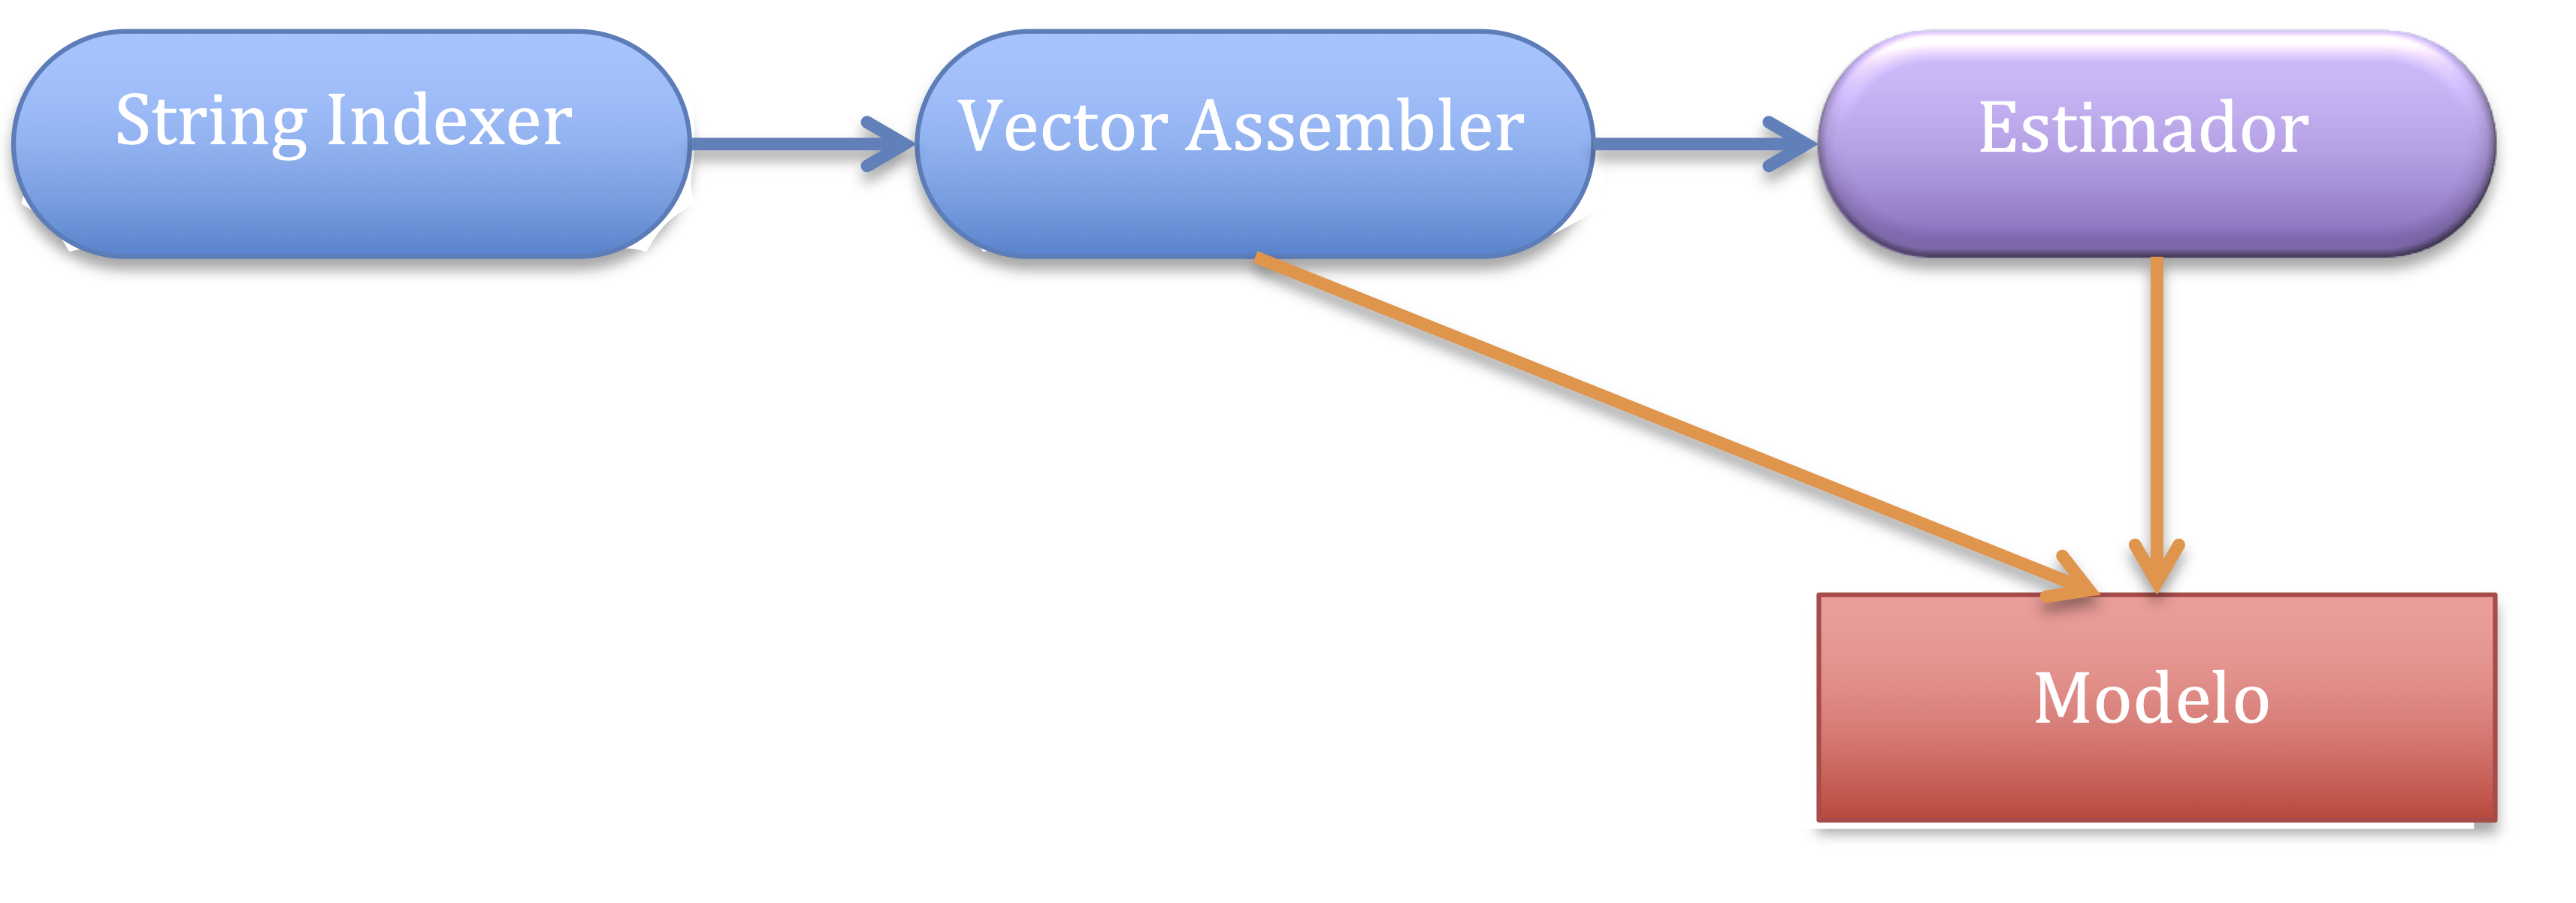

> *Figura 1. Ejemplo de un esquema de tuberías en Apache Spark.*

Una vez preprocesados los datos, podemos partirlos en dos conjuntos de entrenamiento y test para poder empezar un algoritmo de Machine Learning.

In [ ]:
train, test = datosPreprocesados.select('atributos','clase').randomSplit([0.7, 0.3], seed = 2020)
print("DataFrame Entrenamiento: " + str(train.count())+" instancias.")
print("DataFrame Test: " + str(test.count())+" instancias.")

DataFrame Entrenamiento: 231 instancias.
DataFrame Test: 105 instancias.


Como ya vimos, en la cápsula 2 del módulo3, es preferible usar una validación cruzada, en lugar de usar entrenamiento y test. No obstante, en Big Data, no siempre podemos asumir el coste computacional de la validación cruzada y tendremos que usar dos conjuntos disjuntos de entrenamiento y test, que aunque tiene menos rigor estadístico, es mucho menos costosa.

##**4. TUBERÍAS CON MACHINE LEARNING.**

Como hemos visto, hemos incluido todo el preprocesamiento de nuestro conjunto de datos en una tubería. Ahora veremos como añadir también un algoritmo de Machine Learning. 

Seguiremos un ejemplo, concretamente de aprendizaje supervisado,  donde aprenderemos un clasificador de regresión logística a partir de los datos generados anteriormente.

Siguiendo la terminología de Spark aprenderemos un modelo Transformador (que posee el método `transform()`) mediante un Estimador de regresión logística (que posee el método `fit()`). Es decir, aprenderemos un Estimador con los datos de entrenamiento y, el modelo aprendido lo usaremos como un Transformador sobre los datos de test. Dicho Transformador tomará los datos de test y los convertirá en una serie de predicciones. Dichas predicciones las usaremos para calcular la precisión del modelo. 




In [ ]:
from pyspark.ml.classification import LogisticRegression
#Aprendemos el Modelo de Regresión Logística
lr = LogisticRegression(featuresCol = 'atributos', labelCol = 'clase', maxIter=10)
lrModel = lr.fit(train)

#Obtenemos las predicciones sobre el conjunto de test
predicciones = lrModel.transform(test)

#Ya podemos mostrar la precisión del modelo
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluador = MulticlassClassificationEvaluator(labelCol="clase", metricName="accuracy")
print('Accuracy:', evaluador.evaluate(predicciones))

Accuracy: 0.8


El anterior ejemplo, lo podemos mejorar. Ahora lo que haremos será añadir a la tubería el modelo de regresión logística, de esta forma conseguimos que Spark optimice más aún el proceso. Primero partiremos los datos en entrenamiento y test. Definiremos la tubería y aprenderemos el modelo. Dicho modelo, con el preprocesado de datos y el clasificador, se aplicará al conjunto de test para hacer las predicciones y así poder calcular la proporción de bien clasificados.  

In [ ]:
#Partimos los datos (sin preprocesar)
train, test = df.randomSplit([0.7, 0.3], seed = 2020)

#Indexamos la variable de salida
indexador = StringIndexer(inputCol="RNASEQ-CLUSTER_CONSENHIER", outputCol="clase")

#Unimos las variables de entrada con VectorAssembler
assembler = VectorAssembler(inputCols=dfX.columns,outputCol="atributos")

#Incorporamos el modelo de regresión logística
lr = LogisticRegression(featuresCol = 'atributos', labelCol = 'clase', maxIter=10)

#Añadimos las etapas a una tubería
etapas=[indexador, assembler,lr]
modeloRL = Pipeline().setStages(etapas)

#Construimos el modelo: preprocesamiento + regresión logística
clasificador = modeloRL.fit(train)

#Obtenemos las predicciones sobre el conjunto de test
predicciones = clasificador.transform(test)

#Ya podemos mostrar la precisión del modelo
evaluator = MulticlassClassificationEvaluator(labelCol="clase", metricName="accuracy")
print('Accuracy:', evaluator.evaluate(predicciones))


Accuracy: 0.8


Veamos a continuación las métricas y modelos de validación que podemos usar en Spark, pero nos centraremos en el aprendizaje supervisado. Será en la siguiente cápsula donde hablaremos del aprendizaje no supervisado.

##**5. MÉTRICAS PARA LA EVALUACIÓN DE LOS MODELOS DE APRENDIZAJE SUPERVISADO.**

Dentro de las herramientas de aprendizaje supervisado, tenemos clasificadores y regresores, dependiendo de si la variable que queremos predecir es discreta o continua, respectivamente.

En los clasificadores, distinguiremos aquellos que son para clasificación binaria, es decir, la variable de salida sólo tiene dos estados, de la clasificación multiclase, es decir, aquellos en los que la variable de salida tiene más de dos estados.

Tengamos en cuenta, que los clasificadores que nos permiten trabajar con problemas multiclase también nos permiten trabajar con problemas binarios. Lo cual tiene sentido, es decir,  si un algoritmo es capaz de discriminar entre 4 ó 10 valores de la variable de salida, también debería ser capaz de distinguir entre dos.

No obstante, también podemos usar clasificadores binarios en problemas multiclase, por ejemplo, utilizando la metodología Uno-contra-todos.  Este esquema construye un clasificador base para cada valor de la variable de salida y dicho clasificador distingue el valor i-ésimo del resto. 

A la hora de evaluar los algoritmos de aprendizaje supervisado, se han visto distintas métricas en capítulos anteriores del curso. Veamos como obtenerlas con Spark.

Primero, nos vamos a centrar en el caso de los problemas de clasificación binaria. En estos clasificadores vamos a usar la clase `BinaryClassificationEvaluator` que nos permite 
calcular la medida `areaUnderROC` que es el área bajo la curva ROC, o también AUC que se ha visto en módulos anteriores.
<!--calcular dos medidas:


1.   `areaUnderROC` : El área bajo la curva ROC, o también ROC AUC. Se ha visto ya previamente. 
2.   `areaUnderPR`: Es el área bajo la curva  Precision-Recall, o también Precision-Recall AUC. La curva PR es el resultado de dibujar la gráfica entre el precision y el recall. Esta gráfica nos permite ver a partir de qué recall tenemos una degradación de la precisión y viceversa. Lo ideal sería una curva que se acerque lo máximo posible a la esquina superior derecha (alta precisión y alto recall). Esta métrica es más apropiada para conjuntos no balanceados, es decir, hay un reparto desigual acusado entre las dos clases del problema.

Vamos a usar el ejemplo anterior para mostrar ambas métricas:

-->
<!-- #La regresión logística, también nos permite mostras la curvas ROC
import matplotlib.pyplot as plt
trainingSummary = clasificador.stages[-1].summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'].tolist(),roc['TPR'].tolist(),color='orange')
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.show()
-->

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

#Ya podemos mostrar la bondad de las predicciones del modelo
evaluator = BinaryClassificationEvaluator(labelCol="clase", metricName="areaUnderROC")
print('ROC AUC:', evaluator.evaluate(predicciones))

ROC AUC: 0.852


Veamos ahora el caso, de la clasificación multiclase. Hay que señalar que las métricas que usan cuando hay más de una clase se pueden usar igualmente en clasificación binaria.  En este caso vamos a usar la clase `MulticlassClassificationEvaluator` y las medidas que podemos obtener son:
*  `accuracy`: También llamado proporción de bien clasificados. Se refiere a la ratio de ejemplos positivos correctamente identificados con respecto al total. 
*  `weightedPrecision`: Es la precisión promediada por etiqueta, es decir, se calcula la media de la precisión por cada etiqueta.
*  `weightedRecall`: Es el *Recall* promediado por etiqueta, es decir, se calcula la media de la precisión por cada etiqueta.
*  `f1`: También denominado *F-measure*, es la métrica que combina *precision* y  *recall*.

Sigamos con el ejemplo anterior que, aún siendo un problema de clasificación binario, podemos calcular estas medidas:


In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

#Ya podemos mostrar la bondad de las predicciones del modelo multiclase
evaluator = MulticlassClassificationEvaluator(labelCol="clase")
print('F1:', evaluator.evaluate(predicciones))
print('Accuracy:', evaluator.evaluate(predicciones, {evaluator.metricName: "accuracy"}))
print('Weighted Precision:', evaluator.evaluate(predicciones, {evaluator.metricName: "weightedPrecision"}))
print('Weighted Recall:', evaluator.evaluate(predicciones, {evaluator.metricName: "weightedRecall"}))

F1: 0.8001088830414662
Accuracy: 0.8
Weighted Precision: 0.8015239477503628
Weighted Recall: 0.8




Cuando la variable a predecir es una variable continua, se dice que el modelo Machine Learning es un regresor. Para regresión vamos a usar la clase `RegressionEvaluator` y las medidas vistas en el módulo 4 que podemos obtener son:
<!--* `mse`: Error cuadrático medio. Mide el error cuadrado promedio de nuestras predicciones. Para cada punto, calcula la diferencia cuadrada entre las predicciones y el objetivo y luego promedia esos valores.-->
* `rmse`:  Es la raíz cuadrada del error cuadrático medio. La raíz cuadrada se introduce para hacer que la escala de los errores sea igual a la escala de los objetivos.

* `r2`:  El coeficiente de determinación, o $r^2$, está estrechamente relacionada con el error cuadrático medio, pero siempre estará entre -∞ y 1.
<!--* `mae`: Error absoluto medio. El error se calcula como un promedio de diferencias absolutas entre los valores objetivo y las predicciones. De esta forma, todas las diferencias individuales se ponderan por igual en el promedio.-->


Sigamos con el ejemplo anterior, pero al SER un problema de clasificación binario, no van a tener mucho sentido los resultados. Sólo nos sirve para ver cómo se usa:
<!-- from pyspark.ml.evaluation import RegressionEvaluator

#Ya podemos mostrar la bondad de las predicciones del modelo multiclase
evaluator = RegressionEvaluator(labelCol="clase")
print('rmse:', evaluator.evaluate(predicciones))
print('mse:', evaluator.evaluate(predicciones, {evaluator.metricName: "mse"}))
print('r2:', evaluator.evaluate(predicciones, {evaluator.metricName: "r2"}))
print('mae:', evaluator.evaluate(predicciones, {evaluator.metricName: "mae"}))-->



In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

#Ya podemos mostrar la bondad de las predicciones del modelo multiclase
evaluator = RegressionEvaluator(labelCol="clase")
print('rmse:', evaluator.evaluate(predicciones))
print('r2:', evaluator.evaluate(predicciones, {evaluator.metricName: "r2"}))


rmse: 0.4472135954999579
r2: 0.19818181818181813


##**6. VALIDACIÓN DE LOS MODELOS DE APRENDIZAJE SUPERVISADO.**

Hasta ahora, hemos validado nuestro modelo de ejemplo con diversas métricas, pero usando un sólo método: Entrenamiento y Test. Aunque hemos sido nosotros, con nuestro código, quien se ha encargado de partir los datos, entrenar el modelo con el conjunto de entrenamiento y probarlo con el de test, se puede automatizar este proceso. Podemos usar la clase `TrainValidationSplit`, indicándole el modelo del clasificador, un objeto `ParamGrimBuilder` que se utiliza en otras funcionalidades que no veremos, la clase que se encarga de la evaluación y finalmente la proporción de la partición. 


In [ ]:
from pyspark.ml.tuning import TrainValidationSplit, ParamGridBuilder

#Creamos una clase Evaluador
evaluador = MulticlassClassificationEvaluator(labelCol="clase", metricName="accuracy")

#Usamos la regresión logística para ser evaluada 
validadorTT= TrainValidationSplit(estimator=modeloRL,
                           estimatorParamMaps=ParamGridBuilder().build(),
                           evaluator=evaluador,
                           trainRatio=0.8) # 80% de los datos para entrenamiento
validadorTT.setSeed(2020)
#Entrenamos el modelo con el conjunto completo de datos
modeloTT=validadorTT.fit(df)

#Mostramos la precisión del modelo
print(modeloTT.getEvaluator().getMetricName(), ':',modeloTT.validationMetrics[0] )

accuracy : 0.7183098591549296



Este tipo de validación es bastante sencillo y rápido, aunque como vimos, tiene poco rigor estadístico y los resultados dependen demasiado de cómo hagamos la partición de los datos. A modo de curiosidad, si la semilla aleatoria elegida hubiese sido `seed=2021`, en lugar de `seed=2020`, los resultados en Accuracy hubieran sido un 8% mejores.

Al ser una validación tan sesgada, es preferible hacer una validación cruzada de, al menos, unas 10 hojas. No obstante, en Big Data, como hemos dicho, no siempre podremos permitirnos el lujo de escoger una validación tan costosa.

Para esta validación podemos usar la clase `CrossValidator`, y donde antes indicábamos el porcentaje de datos para entrenamiento, ahora indicaremos el número de hojas. 

In [ ]:
from pyspark.ml.tuning import CrossValidator

#Validación cruzada
crossval = CrossValidator(estimator=modeloRL,
                          estimatorParamMaps=ParamGridBuilder().build(),
                          evaluator=evaluador,
                          numFolds=10) 
#Entrenamos el modelo
cvModel=crossval.fit(df)

#Ya podemos mostrar la precisión del modelo
print(cvModel.getEvaluator().getMetricName(), ':',cvModel.avgMetrics[0])

accuracy : 0.8433392448605431


## **REFERENCIAS BIBLIOGRÁFICAS**

* The Apache Software Foundation. "Machine Learning Library (MLlib) Guide". (2020). [Acceso 9 de junio de 2020]. Disponible en: https://spark.apache.org/docs/latest/ml-guide.html

* The Apache Software Foundation. "Pyspark.ml package API". (2020). [Acceso 9 de junio de 2020]. Disponible en: https://spark.apache.org/docs/latest/api/python/pyspark.ml.html

* The Apache Software Foundation. "Extracting, transforming and selecting features". (2020). [Acceso 9 de junio de 2020]. Disponible en: http://spark.apache.org/docs/latest/ml-features.html

* The Apache Software Foundation. "ML Pipelines". (2020). [Acceso 9 de junio de 2020]. Disponible en: https://spark.apache.org/docs/latest/ml-pipeline.html



###**Referencias Adicionales**

* Lakshay Arora. "Want to Build Machine Learning Pipelines? A Quick Introduction using PySpark". (2019). [Acceso 9 de junio de 2020]. Disponible en: https://www.analyticsvidhya.com/blog/2019/11/build-machine-learning-pipelines-pyspark/

* Susan Li. "Machine Learning with PySpark and MLlib — Solving a Binary Classification Problem". (2018). [Acceso 9 de junio de 2020]. Disponible en:  https://towardsdatascience.com/machine-learning-with-pyspark-and-mllib-solving-a-binary-classification-problem-96396065d2aa

* The Apache Software Foundation. "Evaluation Metrics - RDD-based API". (2020). [Acceso 9 de junio de 2020]. Disponible en: https://spark.apache.org/docs/latest/mllib-evaluation-metrics.html


* The Apache Software Foundation. "ML Tuning: model selection and hyperparameter tuning". (2020). [Acceso 9 de junio de 2020]. Disponible en: https://spark.apache.org/docs/latest/ml-tuning.html#ml-tuning-model-selection-and-hyperparameter-tuning


<div class="alert alert-block alert-success">

MOOC Machine Learning y Big Data para la Bioinformática (1ª edición)   
http://abierta.ugr.es     
    
![CC](https://mirrors.creativecommons.org/presskit/buttons/88x31/png/by-nc-nd.png)
</div>    